# Analysis of Kenyan Census Trends
## 1. Introduction
### 1.1 Project Description
This project will analyze demographic trends from the Republic of Kenya, making use of census data made available by the Kenya National Bureau of Statistics (KNBS). It will also be a showcase of the usefulness of Python in the field of data science as the programming language will be extensively used in breaking down census data and in its presentation with the wide array of tools and modules made available by the language.

### 1.2 Project Objectives
The main objective of this project is to break down and analyze Kenya's census data.
Specifically, the project will:
<ol>
    <li>Examine the changes in Kenya's population.</li>
    <li>Break down the national census data based on regions.</li>
    <li>Visualize the data with the help of graphs and charts.</li>
</ol>

### 1.3 Research Questions
The study aims to gain an in-depth look at Kenya's demographic trends. Therefore, the following questions must be asked:
<ol>
    <li>What is the overall demographic trend in Kenya?</li>
    <li>Is population growth higher in some regions compared to others?</li>
    <li>Is there any increase or slowing down in population growth rates?</li>
</ol>

In [26]:
# Importing the needed modules
import pandas as pd
import matplotlib.pyplot as plt

## 2.  Census Data and Counts Summary
### 2.1 DataFrame Creation
While the census counts contain data from 1897, detailed census tallying would only begin in 1962. The census data employed uses post-independence data from 1969 onwards, with records from then on consistently updated every decade. To analyze the census data, the CSV data will be made into a DataFrame with the help of the Pandas library.

In [15]:
# Creating DataFrames from the two csv files
census_data = pd.read_csv('census-data.csv')

### 2.2. Dimensions, Labels, and Data Types.
For a better understanding of <code>census_data</code>, a closer look at the various components contained therein is required.

In [16]:
# census_data dimensions, columns, and data types
print(census_data.shape)
print(census_data.columns)
print(census_data.dtypes)

(6, 10)
Index(['year', 'central', 'coast', 'eastern', 'nairobi', 'north eastern',
       'nyanza', 'rift valley', 'western', 'total'],
      dtype='object')
year             int64
central          int64
coast            int64
eastern          int64
nairobi          int64
north eastern    int64
nyanza           int64
rift valley      int64
western          int64
total            int64
dtype: object


The years in <code>census_data</code> are saved as integers. They must be converted into the appropriate datetime format.

In [17]:
# Converting the years to datetime
census_data['year'] = pd.to_datetime(census_data['year'], format='%Y')

print(census_data['year'].dtypes)

datetime64[ns]


## 3. Population Differences and Regional Share.
With the years in the appropriate datetime format, the demographic trends across the censuses can now be analyzed. The census data is used to determine the intercensal change in population, the percentage change, and each region's share of the total population. The census data is also simplified to aid in graphical display.

This requires the creation of new DataFrames from the census data.

In [18]:
# Creating dictionaries for the respective data
difference_dict = {}
percent_dict = {}
share_dict = {}
simplified_dict = {}

# For loop to perform operations on a column to column basis for our differences and percentages.
for column in census_data.columns:
    # Creating lists to store the differences, percentage and regional share data to be added to the dictionaries
    difference_data = []
    percent_data = []
    share_data = []
    simplified_data = []

    # For loop to go through each row n of the census data column
    for n in range(len(census_data[column])):

        # If statement do avoid performing operations on the datetime objects in the year column
        if column == 'year':
            share_data.append(census_data[column][n].year)

            # n should not be zero to create intercensal values using current row (n) and preceding row (n - 1)
            if n > 0:
                difference_data.append(f"{census_data[column][n - 1].year} - {census_data[column][n].year}")
        else:
            # Finding the regional share of total population
            share_percent = census_data[column][n]/census_data['total'][n] * 100
            share_data.append(share_percent.round(decimals=2))

            # Simplifyiing the census values for graphical representation
            rounded_census = census_data[column][n]/1000000
            simplified_data.append(rounded_census.round(decimals=2))

            # n should not be zero due to subtraction of current row (n) with preceding row (n - 1)
            # therefore operations must start from the second row (1)
            if n > 0:
                pop_diff = census_data[column][n] - census_data[column][n - 1]
                difference_data.append(pop_diff/1000)

                pop_percent = pop_diff / census_data[column][n - 1] * 100
                percent_data.append(pop_percent.round(decimals=2))

    # Making the list data the value for the dictionary key bearing the column name
    difference_dict[column] = difference_data

    if column == 'year':
        percent_dict[column] = difference_data
        share_dict[column] = share_data
        simplified_dict[column] = share_data
    else:
        percent_dict[column] = percent_data
        share_dict[column] = share_data
        simplified_dict[column] = simplified_data

# Using the dictionaries to create respective DataFrames
population_difference = pd.DataFrame(difference_dict)
percentage_difference = pd.DataFrame(percent_dict)
regional_share = pd.DataFrame(share_dict).drop(columns='total')
simplified_census = pd.DataFrame(simplified_dict)

### 3.1 Population Differences

In [19]:
print(population_difference)
print(percentage_difference)

          year   central     coast   eastern   nairobi  north eastern  \
0  1969 - 1979   670.186   398.712   812.550   318.489        128.030   
1  1979 - 1989   765.422   482.967  1048.838   496.795         -2.396   
2  1989 - 1999   612.904   661.503   863.090   818.684        590.752   
3  1999 - 2009   659.584   838.043  1036.344   995.115       1348.614   
4  2009 - 2019  1098.496  1004.167  1152.926  1258.704        179.316   

     nyanza  rift valley  western     total  
0   521.911     1030.113  504.365  4384.356  
1   863.204     1677.149  789.734  6121.713  
2   885.036     2069.485  736.379  7237.833  
3  1050.515     3019.769  975.506  9923.490  
4   826.868     2746.161  687.561  8954.199  
          year  central  coast  eastern  nairobi  north eastern  nyanza  \
0  1969 - 1979    40.00  42.23    42.60    62.54          52.10   24.59   
1  1979 - 1989    32.63  35.97    38.56    60.02          -0.64   32.65   
2  1989 - 1999    19.70  36.23    22.90    61.81         159

The population differences reveal steady growth within the regions, with the percentage growth experiencing a gradual trend downwards. The North Eastern region sticks out, with the 1979 - 1989 period revealing a population decline in contrast with the rest of the country. The North Eastern region also has an erratic growth rate, from an initial 52.1% increase to a decline of -0.64% and then back to a 159.06% increase, the latter growth being the largest percentage increase of the 1989 - 1999 period.

When it comes to Kenya's total population, the trends continue to reveal a steady growth rate. Each new intercensal record shows an increase in the country's raw population numbers but the growth rate appears to experience the same gradual decline as in the nation's component regions. The total intercensal growth rate went from 40.07% in the 1969 - 1979 period to 23.19% in the 2009 - 2019 period.

### 3.2 Regional Share

In [20]:
print(regional_share)

   year  central  coast  eastern  nairobi  north eastern  nyanza  rift valley  \
0  1969    15.31   8.63    17.43     4.65           2.25   19.39        20.20   
1  1979    15.31   8.76    17.75     5.40           2.44   17.25        21.14   
2  1989    14.51   8.51    17.57     6.18           1.73   16.35        22.93   
3  1999    12.98   8.67    16.15     7.47           3.35   15.31        24.36   
4  2009    11.35   8.61    14.68     8.13           5.98   14.10        25.92   
5  2019    11.53   9.10    14.34     9.24           5.24   13.18        26.81   

   western  
0    12.14  
1    11.96  
2    12.23  
3    11.71  
4    11.23  
5    10.56  


When it comes to regional share, Rift Valley consistently maintains its position as having the largest share of Kenya's population. A closer look reveals the region's share to be on an upward trend, from 20.20% in 1969 to 26.81% in 2019.

The North Eastern region also consistently retains its place as having the smallest share of Kenya's population. However, there seems to be an improvement, with the region now holding 5.24% of the total population in 2019 compared to 2.25% in 1969 and the region's low-point of 1.73% in 1989.

## 4. Data visualization
The trends discussed can be highlighted further with the help of charts and graphs to better explain the census numbers and visualize the periodical changes.

### 4.1 Bar Graphs

#### 4.1.1 Regional Share of Population

Text(0.5, 1.0, 'Regional Share')

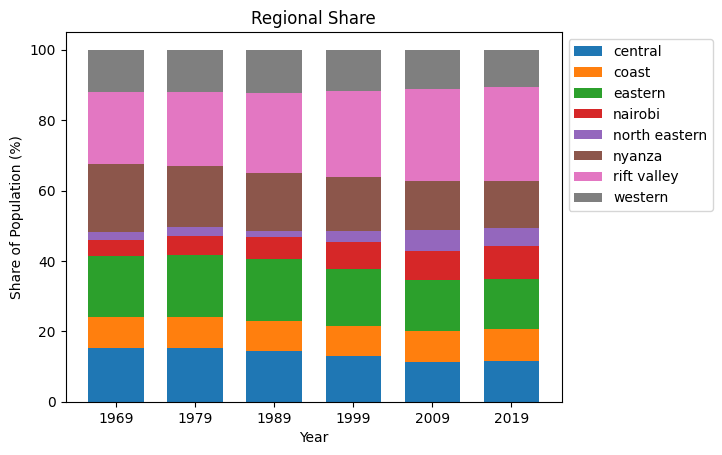

In [21]:
# Stacked bar graph for regional share of population
bottom = 0

plt.xticks(regional_share['year'])
for column in regional_share.columns[1:]:
    plt.bar(regional_share['year'], regional_share[column], width=7, bottom=bottom)
    bottom += regional_share[column]

plt.legend(regional_share.drop(columns='year'), bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Share of Population (%)')
plt.title('Regional Share')

#### 4.1.2 Total Population Growth

Text(0.5, 1.0, 'Total Population')

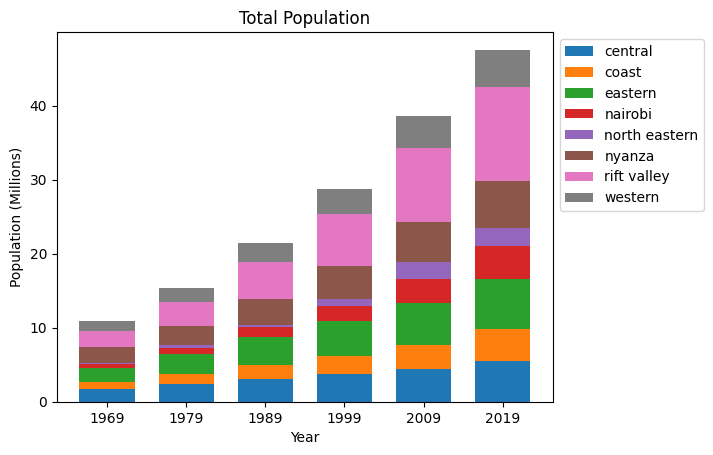

In [22]:
# Stacked bar graph for total population
bottom = 0

plt.xticks(simplified_census['year'])
for column in simplified_census.columns[1:-1]:
    plt.bar(simplified_census['year'], simplified_census[column], width=7, bottom=bottom)
    bottom += simplified_census[column]

plt.legend(simplified_census.drop(columns='year'), bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.title('Total Population')

### 4.2 Line Graphs

#### 4.2.1 Regional Population Growth

Text(0.5, 1.0, 'Regional Population')

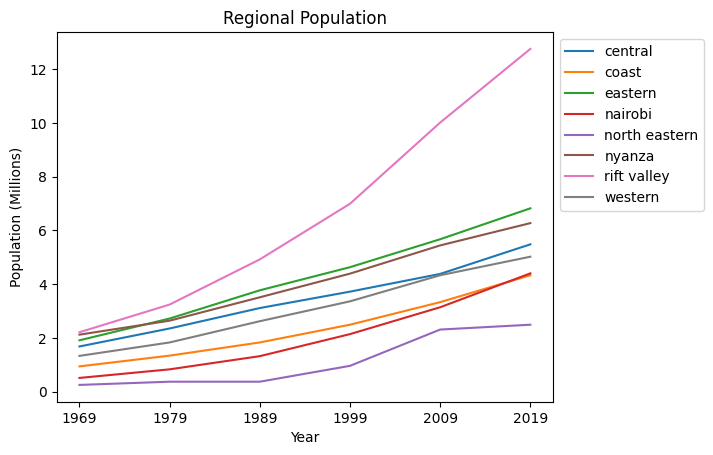

In [23]:
# Line chart for regional population
plt.xticks(simplified_census['year'])
for column in simplified_census.columns[1:-1]:
    plt.plot(simplified_census['year'], simplified_census[column])

plt.legend(simplified_census.drop(columns='year'), bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.title('Regional Population')

#### 4.2.2 Regional Share of Population

Text(0.5, 1.0, 'Regional Share')

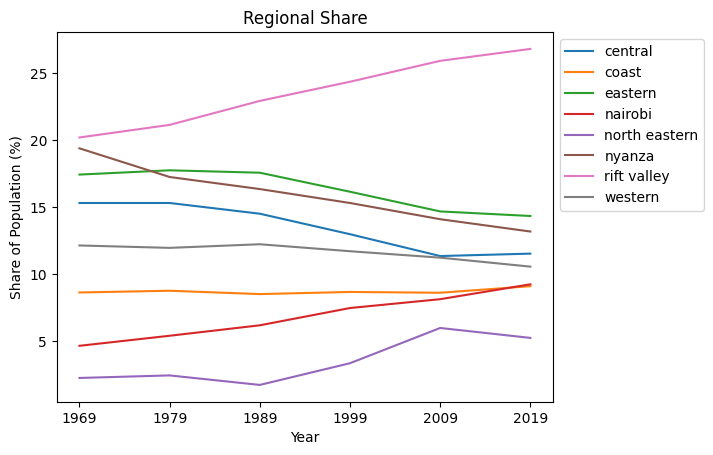

In [24]:
# Line graph for regional share of population
plt.xticks(simplified_census['year'])
for column in regional_share.columns[1:]:
    plt.plot(regional_share['year'], regional_share[column])

plt.legend(simplified_census.drop(columns='year'), bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Share of Population (%)')
plt.title('Regional Share')

#### 4.2.3 Percentage Growth

Text(0.5, 1.0, 'Growth Rate')

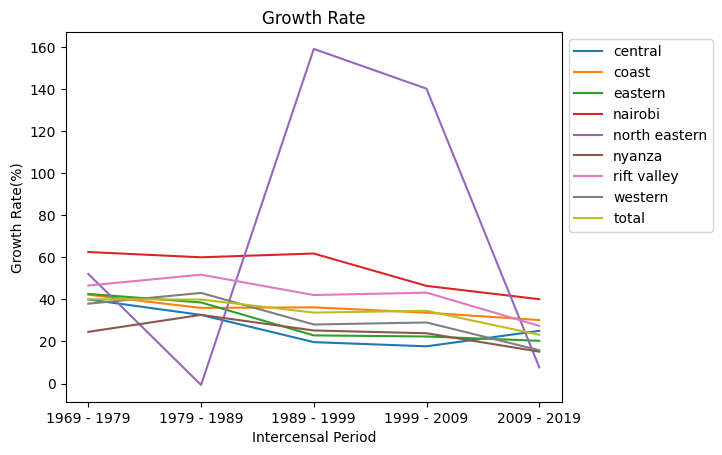

In [25]:
# Line graph for percentage growth rate
for column in percentage_difference.columns[1:]:
    plt.plot(percentage_difference['year'], percentage_difference[column])

plt.legend(percentage_difference.drop(columns='year'), bbox_to_anchor=(1, 1))
plt.xlabel('Intercensal Period')
plt.ylabel('Growth Rate(%)')
plt.title('Growth Rate')

## 5. Discussion and Conclusion
### 5.1 Project Discussion
The data presented in chapters three and four is sufficient to answer the project questions presented in the first chapter.
#### 5.1.1 What is the overall trend in Kenya's population?
Based on the table showing population and percentage differences in section 3.1, it can be definitively said that Kenya's regions, bar North Eastern, are experiencing an upward trend in their populations. The nation's population rise is made clearer in the bar graph in section 4.1.2 and the regional growth line graph in section 4.2.1.

#### 5.1.2 Is population growth higher in some regions compared to others?
Yes, some regions do seem to exhibit a higher rate of population increase than others. Rift Valley region shows a considerable growth rate when compared to the rest of the regions. This can be explained by the fact that Rift Valley is Kenya's largest region, and when the availability of arable land and a welcoming climate is put into the equation, allows for higher-than-normal population growth.

While North Eastern is the country's third largest region, other factors have led to its erratic trends. The region is mostly arid and semi-arid, making it sparsely populated with a pastoral culture. North Eastern has also experienced great political upheavals since independence, from the 1960s Shifta War to recent incursions by the Al-Shabaab terrorist group from neighboring Somalia. All this turmoil has likely led to emigration to other regions of the country, contributing to the negative growth rate in the 1979 - 1989 intercensal period and the region having a lower share of the nation's population.

Nairobi continues to see its share of the total population increase. Apart from serving as Kenya's political capital, Nairobi is also the nation's economic heart and contributes much to the country's overall Gross Domestic Product. The increase in Nairobi's population can therefore be attributed to economic migrants from other regions flocking to the city in search of a better life as well as local births.

#### 5.1.3 Is there any increase or slowing down in growth rates?
The tabular and graphical data both reveal a slowing down. While the nation and its regions experience a population boom, the percentage rate of growth clearly shows a gradual movement downwards. This is revealed in the percentage difference table in section 3.1 and its accompanying line graph in section 4.2.3.

### 5.2 Conclusion
The trends from the census data reveal an upward growth rate for the Republic of Kenya since independence. The population boom is likely to continue in the future, with the growth rate steadily declining as revealed by intercensal percentage changes. A larger population might prove advantageous, especially as a labor source for its burgeoning economy.

However, the population boom experienced in Nairobi must be controlled. Nairobi's large population has already proved to be a major obstacle to proper urban planning, with the capital becoming home to Africa's largest slum. If the population growth in Nairobi and its environs continues at the rate revealed by the census, proper development of the city will prove next to impossible. It is therefore important for the government to find ways of creating employment opportunities in other parts of the country rather than having most economic activity concentrated in the capital.